                                                   # IMPORTING THE LIBRARIES

In [50]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
irisdataset=pd.read_csv('IRIS.csv');
irisdataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
irisdataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
irisdataset.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


                                            # INFORMATION OF IRIS DATA SET

In [17]:
irisdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


                                              # DESCRIPTION OF IRIS DATA SET

In [18]:
irisdataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


                                             # EXPLORATORY DATA ANALYSIS

<Axes: title={'center': 'Iris Flower Classification'}, ylabel='Frequency'>

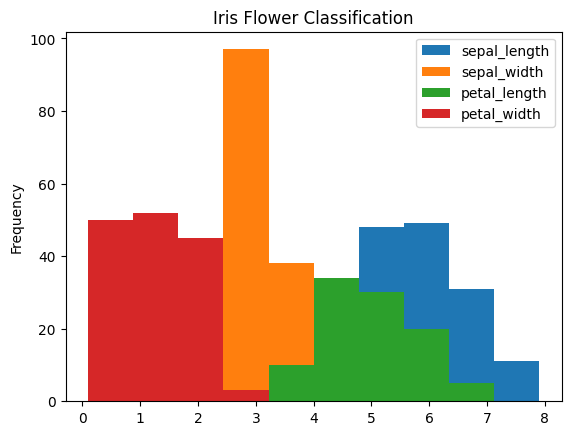

In [20]:
irisdataset.plot(kind='hist',title='Iris Flower Classification')

<Axes: xlabel='sepal_width', ylabel='count'>

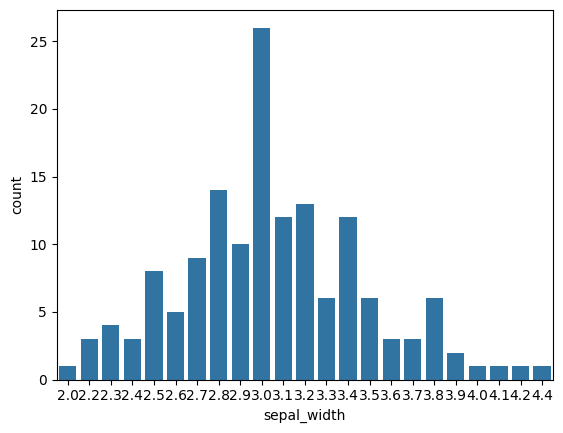

In [22]:
sns.countplot(x='sepal_width',data=irisdataset)

<Axes: xlabel='sepal_width'>

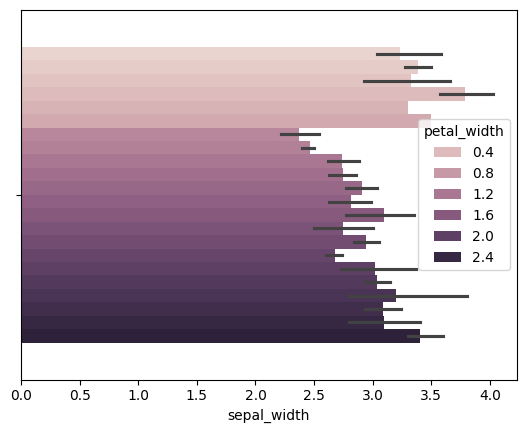

In [24]:
sns.barplot(x='sepal_width',data=irisdataset,hue='petal_width')

<Axes: xlabel='sepal_length'>

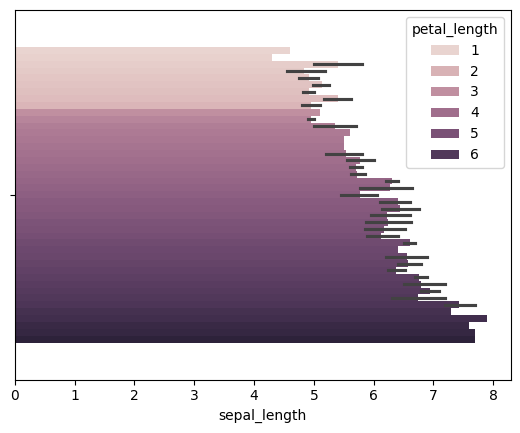

In [55]:
sns.barplot(x='sepal_length',data=irisdataset,hue='petal_length')

<Axes: xlabel='species', ylabel='count'>

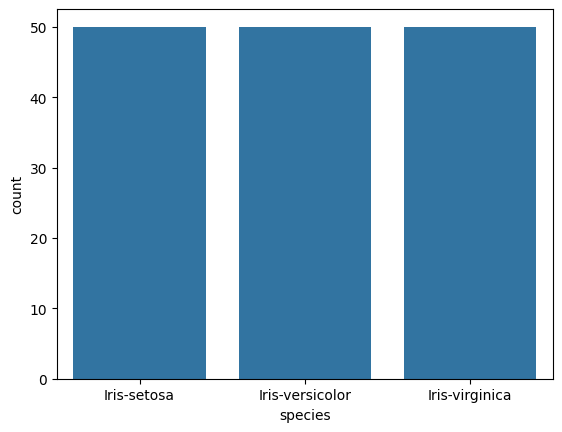

In [36]:
sns.countplot(x='species',data=irisdataset)

In [25]:
irisdataset.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [37]:
irisdataset.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

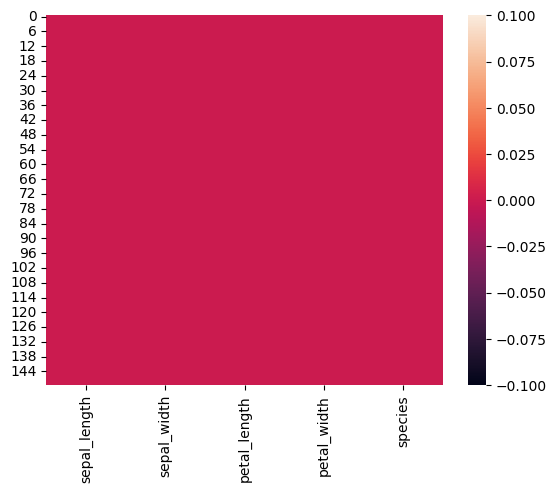

In [27]:
sns.heatmap(irisdataset.isna())

In [32]:
(irisdataset['sepal_width'].isna().sum()/len(irisdataset['sepal_width']))*100

0.0

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

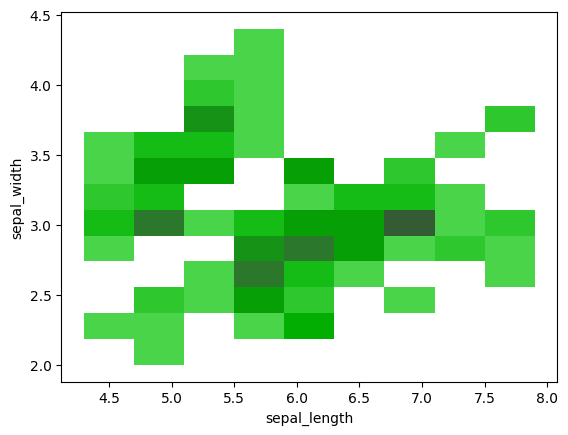

In [35]:
sns.histplot(x='sepal_length',y='sepal_width',data=irisdataset,color='g')

<Axes: xlabel='petal_length', ylabel='petal_width'>

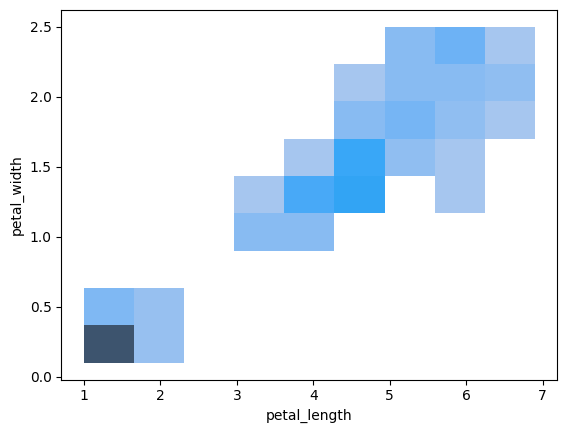

In [36]:
sns.histplot(x='petal_length',y='petal_width',data=irisdataset)

In [38]:
irisdataset.sepal_length.unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [39]:
irisdataset.petal_length.unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [40]:
irisdataset.sepal_width.unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [41]:
irisdataset.petal_width.unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [3]:
irisdataset['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

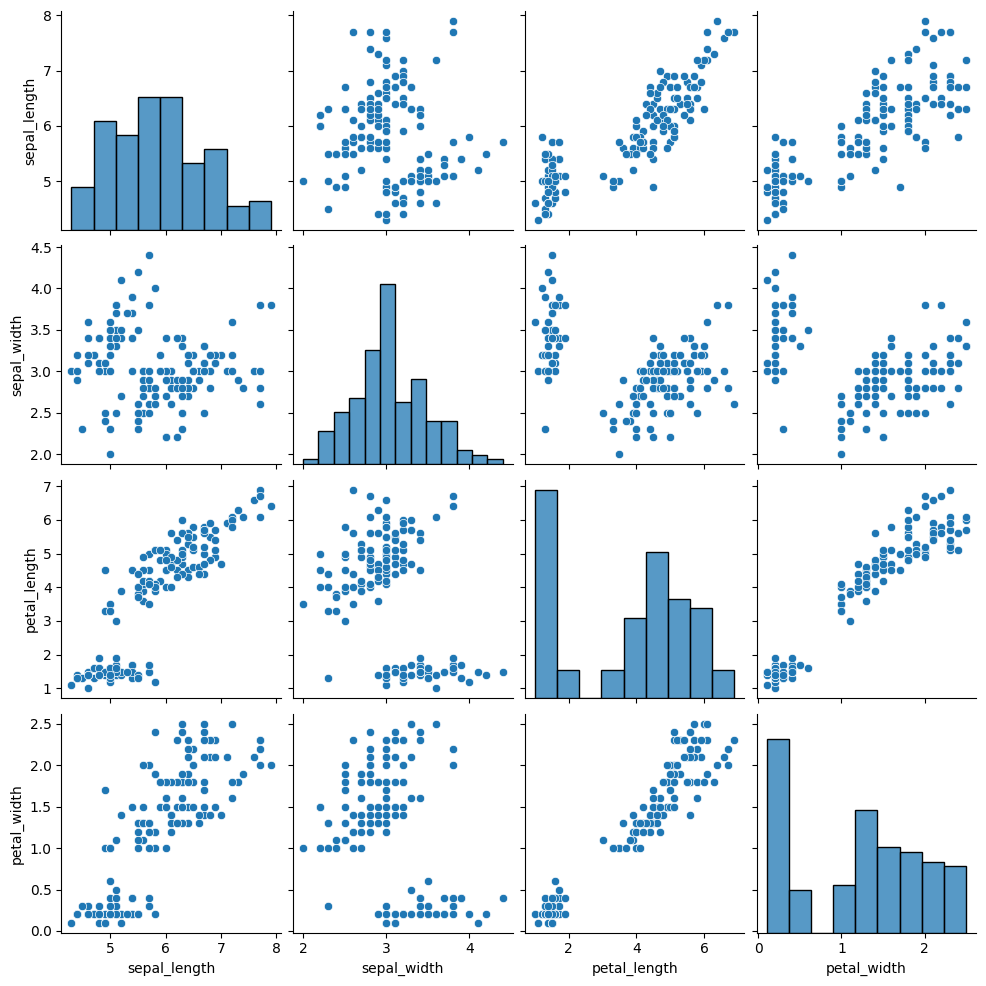

In [42]:
sns.pairplot(irisdataset)
numeric_columns = irisdataset.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = irisdataset[numeric_columns].corr(method='spearman')

                                         # SPLITTING THE DATA "SPECIES" ACCORDING TO THE CATEGORIES

In [11]:
bw=irisdataset[irisdataset.species=='Iris-setosa']
bw

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


                            # SPLITTING THE DATA "SPECIES" ACCORDING TO THE LENGTH AND WIDTH

In [15]:
sepallen=bw[bw.sepal_length>5.0]

In [16]:
sepalwid=bw[bw.sepal_width>=3.0]

In [17]:
petallen=bw[bw.petal_length>=1.0]

In [18]:
petalwid=bw[bw.petal_width>=0.1]

In [19]:
join=pd.concat([sepallen,sepalwid,petallen,petalwid],axis=1)

In [20]:
join

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa,5.1,3.5,1.4,0.2,Iris-setosa,5.1,3.5,1.4,0.2,Iris-setosa,5.1,3.5,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa,5.4,3.9,1.7,0.4,Iris-setosa,5.4,3.9,1.7,0.4,Iris-setosa,5.4,3.9,1.7,0.4,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa,5.4,3.7,1.5,0.2,Iris-setosa,5.4,3.7,1.5,0.2,Iris-setosa,5.4,3.7,1.5,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa,5.8,4.0,1.2,0.2,Iris-setosa,5.8,4.0,1.2,0.2,Iris-setosa,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa,5.7,4.4,1.5,0.4,Iris-setosa,5.7,4.4,1.5,0.4,Iris-setosa,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa,5.4,3.9,1.3,0.4,Iris-setosa,5.4,3.9,1.3,0.4,Iris-setosa,5.4,3.9,1.3,0.4,Iris-setosa
17,5.1,3.5,1.4,0.3,Iris-setosa,5.1,3.5,1.4,0.3,Iris-setosa,5.1,3.5,1.4,0.3,Iris-setosa,5.1,3.5,1.4,0.3,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa,5.7,3.8,1.7,0.3,Iris-setosa,5.7,3.8,1.7,0.3,Iris-setosa,5.7,3.8,1.7,0.3,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa,5.1,3.8,1.5,0.3,Iris-setosa,5.1,3.8,1.5,0.3,Iris-setosa,5.1,3.8,1.5,0.3,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa,5.4,3.4,1.7,0.2,Iris-setosa,5.4,3.4,1.7,0.2,Iris-setosa,5.4,3.4,1.7,0.2,Iris-setosa


In [21]:
iv=irisdataset[irisdataset.species=='Iris-virginica']
iv

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


In [22]:
sepallen=iv[iv.sepal_length>5.0]

In [23]:
sepalwid=iv[iv.sepal_width>3.0]

In [24]:
petallen=iv[iv.petal_length>=1.0]

In [25]:
petalwid=iv[iv.petal_width>=0.1]

In [26]:
join=pd.concat([sepallen,sepalwid,petallen,petalwid],axis=1)

In [27]:
join

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,Iris-virginica,6.3,3.3,6.0,2.5,Iris-virginica,6.3,3.3,6.0,2.5,Iris-virginica,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica,NaN,NaN,NaN,NaN,NaN,5.8,2.7,5.1,1.9,Iris-virginica,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica,NaN,NaN,NaN,NaN,NaN,7.1,3.0,5.9,2.1,Iris-virginica,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica,NaN,NaN,NaN,NaN,NaN,6.3,2.9,5.6,1.8,Iris-virginica,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica,NaN,NaN,NaN,NaN,NaN,6.5,3.0,5.8,2.2,Iris-virginica,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica,NaN,NaN,NaN,NaN,NaN,7.6,3.0,6.6,2.1,Iris-virginica,7.6,3.0,6.6,2.1,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica,NaN,NaN,NaN,NaN,NaN,7.3,2.9,6.3,1.8,Iris-virginica,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica,NaN,NaN,NaN,NaN,NaN,6.7,2.5,5.8,1.8,Iris-virginica,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica,7.2,3.6,6.1,2.5,Iris-virginica,7.2,3.6,6.1,2.5,Iris-virginica,7.2,3.6,6.1,2.5,Iris-virginica
110,6.5,3.2,5.1,2.0,Iris-virginica,6.5,3.2,5.1,2.0,Iris-virginica,6.5,3.2,5.1,2.0,Iris-virginica,6.5,3.2,5.1,2.0,Iris-virginica


In [28]:
vc=irisdataset[irisdataset.species=='Iris-versicolor']
vc

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


In [29]:
sepallen=vc[vc.sepal_length>=5.0]


In [30]:
sepalwid=vc[vc.sepal_width>=3.0]

In [31]:
petallen=vc[vc.petal_length>=1.0]

In [32]:
petalwid=vc[vc.petal_width>=0.1]

In [34]:
join=pd.concat([sepallen,sepalwid,petallen,petalwid],axis=1)
join

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor,7.0,3.2,4.7,1.4,Iris-versicolor,7.0,3.2,4.7,1.4,Iris-versicolor,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor,6.4,3.2,4.5,1.5,Iris-versicolor,6.4,3.2,4.5,1.5,Iris-versicolor,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor,6.9,3.1,4.9,1.5,Iris-versicolor,6.9,3.1,4.9,1.5,Iris-versicolor,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor,NaN,NaN,NaN,NaN,NaN,5.5,2.3,4.0,1.3,Iris-versicolor,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor,NaN,NaN,NaN,NaN,NaN,6.5,2.8,4.6,1.5,Iris-versicolor,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor,NaN,NaN,NaN,NaN,NaN,5.7,2.8,4.5,1.3,Iris-versicolor,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor,6.3,3.3,4.7,1.6,Iris-versicolor,6.3,3.3,4.7,1.6,Iris-versicolor,6.3,3.3,4.7,1.6,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor,NaN,NaN,NaN,NaN,NaN,6.6,2.9,4.6,1.3,Iris-versicolor,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor,NaN,NaN,NaN,NaN,NaN,5.2,2.7,3.9,1.4,Iris-versicolor,5.2,2.7,3.9,1.4,Iris-versicolor
60,5.0,2.0,3.5,1.0,Iris-versicolor,NaN,NaN,NaN,NaN,NaN,5.0,2.0,3.5,1.0,Iris-versicolor,5.0,2.0,3.5,1.0,Iris-versicolor


In [38]:
X=irisdataset.drop(columns='species') 
Y=irisdataset['species']
print(X)
print(Y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: obj

                                                        MACHINE LEARNING MODEL

In [5]:
le = LabelEncoder()

In [6]:
irisdataset['species'] = le.fit_transform(irisdataset['species'])
irisdataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
irisdataset.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [31]:
X = irisdataset.drop(columns=['species'])
Y = irisdataset['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [32]:
model = LogisticRegression()

In [35]:
model.fit(x_train, y_train)

LogisticRegression()

In [54]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [51]:
model = DecisionTreeClassifier()

In [52]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [53]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556
